<a href="https://colab.research.google.com/github/lauren-esser/X-Ray-Image-Prediction/blob/master/X_Ray_Prediction_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Final Project Submission:

**Student Name:** Lauren Esser

**Student Pace:** Full Time

**Scheduled Project Review Date/Time:** Tuesday, November 3 at 4:30 pm ET

**Instructor Name:** James Irving

**Blog Post URL:** https://lauren-esser.github.io/from_neuron_to_convolutional_neural_network

# Abstract

A healthy child is more likely to become a healthy adult. This is why I decided to use my Module 4 project to create a model that better helps doctors identify pneumonia in children. 

Throughout this project, I used the OSEMN process. Data was obtained from X_ray Images (Pneumonia) dataset off Kaggle. The Data includes X-Ray images of children aged 1 to 5 with and without pneumonia.  I scrubbed the data splitting it into train, test, and validation directories. During the explore section I looked at different visualizations of the X-Ray Images. For creating my model I began with a baseline Neural Network model, which had 82% accuracy. After experimenting with different parameters I was able to create a Neural Network model with 85% accuracy. Since my task uses image recognition, I chose to also create a Convolutional Neural Network model. My final CNN Model had 88% accuracy and 89% recall on children with pneumonia. I chose to use the CNN Model as my final and best model.

> Here are my findings and business recommendations:
1. Use an image size of 64x64 for faster processing.
2. If focusing on highest Accuracy use CNN Model 3.
3. If focusing on highest Recall use CNN Model 2. 
4. If focusing on highest Precision use the Baseline Neural Network Model.
5. Overall the best Model to use would be CNN Model 3.

# Introduction

Within this notebook I built a deep neural network that trains on the X-Ray Images (Pneumonia) dataset from Kaggle. [Linked Here.](https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia) The goal was to build a model that can classify whether a given patient has pneumonia, given a chest x-ray image. The benefit of this is that it provides extra support to the doctor in diagnosing pneumonia, a sickness that hospitalizes 150,000 Americans each year. Convolutional Neural Networks were used in distinguishing the differences in X-Ray images.  

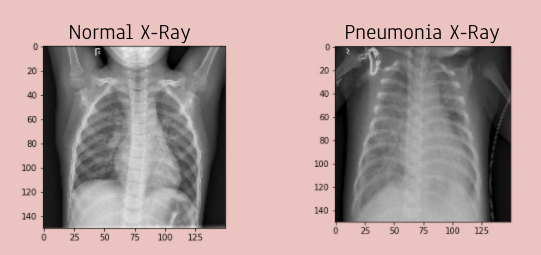

# Import Libraries

>I am choosing to import numpy and tensorflow first in order to ensure random seed holds through Convolutional Neural Networks.

In [ ]:
import numpy as np
np.random.seed(1919)

In [ ]:
import tensorflow as tf
tf.random.set_seed(1919)

In [ ]:
#import other libraries
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, LabelBinarizer
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
import datetime
from PIL import Image
from pathlib import Path
from scipy import ndimage
from sklearn import metrics
import os, glob
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img


# Obtain Data

Data set was downloaded from Chest X-Ray Images (Pneumonia) from Kaggle. [Linked Here.](https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia) The provided dataset was already organized into three folders: train, test, validation. The subfolders for each group include: Pneumonia and Normal. All images come from pediatric patients aged 1 to 5 years old in Guangzhou Women and Children's Medical Center. In this notebook I uploaded the zip file from Kaggle into my Google Drive. You may access the files in my Drive [here.](https://drive.google.com/file/d/1Qy9c2iboOfnmbu8uoJ41_Rm1DamQg4i8/view?usp=sharing) 

In [ ]:
#Connect to google drive
from google.colab import drive 
drive.mount('/gdrive', force_remount=True)

Mounted at /gdrive


In [ ]:
# cd /gdrive
%cd ~
%cd ..

/root
/


In [ ]:
!ls "/gdrive/My Drive/Colab Notebooks/DataSets"

chest-xray-pneumonia-jmi.zip  dogs-vs-cats-sorted.zip


In [ ]:
print(os.path.abspath(os.curdir))
os.listdir()

/


['bin',
 'lib64',
 'dev',
 'usr',
 'srv',
 'var',
 'run',
 'boot',
 'tmp',
 'media',
 'etc',
 'home',
 'opt',
 'mnt',
 'root',
 'proc',
 'lib',
 'sbin',
 'sys',
 'content',
 'gdrive',
 '.dockerenv',
 'datalab',
 'tools',
 'swift',
 'tensorflow-1.15.2',
 'lib32']

In [ ]:
source_folder = r'/gdrive/My Drive/Colab Notebooks/DataSets/'
target_folder = r'/content/'
file = glob.glob(source_folder+ 'chest-xray-pneumonia-jmi.zip', recursive = True)
file = file[0]
file

'/gdrive/My Drive/Colab Notebooks/DataSets/chest-xray-pneumonia-jmi.zip'

In [ ]:
#upzip data
zip_path = file
!cp '{zip_path}' .

!unzip -q chest-xray-pneumonia-jmi.zip
!rm chest-xray-pneumonia-jmi.zip

# Scrub

First we will organize the data into proper directories. This includes:

- Train Directory: Training data/images for teaching the model. 
- Test Directory: Data we will use to test the model once it has learned the relationship between pictures with Pneumonia and without. 
- Validation Directory: Images used to validate the model. This helps prevent overfitting.

In [ ]:
#Create Data Directory
data_dir = Path(r'chest_xray/')

#Train directory
train_dir = data_dir/'train'
pneumonia_train_dir = data_dir/'train'/'PNEUMONIA'
normal_train_dir = data_dir/'train'/'NORMAL'

#Test Directory
test_dir = data_dir/'test'
pneumonia_test_dir = data_dir/'test'/'PNEUMONIA'
normal_test_dir = data_dir/'test'/'NORMAL'

#Validation directory
val_dir = data_dir/'val'
pneumonia_val_dir = data_dir/'val'/'PNEUMONIA'
normal_val_dir = data_dir/'val'/'NORMAL'

In [ ]:
print(os.path.abspath(os.curdir))
!ls

/
bin	    datalab  home   media  root  swift		    tools
boot	    dev      lib    mnt    run	 sys		    usr
chest_xray  etc      lib32  opt    sbin  tensorflow-1.15.2  var
content     gdrive   lib64  proc   srv	 tmp


In [ ]:
#Check length of each directory.
print('Pneumonia Train Length: ', len(os.listdir(pneumonia_train_dir)))
print('Normal Train Length: ', len(os.listdir(normal_train_dir)))
print('---' * 10) 

print('Pneumonia Test Length: ', len(os.listdir(pneumonia_test_dir)))
print('Normal Test Length: ', len(os.listdir(normal_test_dir)))
print('---' * 10)

print('Pneumonia Validation Length: ', len(os.listdir(pneumonia_val_dir)))
print('Normal Validation Length: ', len(os.listdir(normal_val_dir)))
print('---' * 10)

Pneumonia Train Length:  3875
Normal Train Length:  1341
------------------------------
Pneumonia Test Length:  390
Normal Test Length:  234
------------------------------
Pneumonia Validation Length:  8
Normal Validation Length:  8
------------------------------


# Explore

### Visualizations

In [ ]:
# See image function
def see_image(img_file):
  ''' Used to see images from file directories.

  Args: 
    img_file = path of image

  Returns: 
    Image

  Example:
    see_image('/chest_xray/train/NORMAL/IM-0115-0001.jpeg')'''
  filename = img_file
  img1 = load_img(filename, target_size = (150, 150))
  return plt.imshow(img1)

Normal X-Ray Image


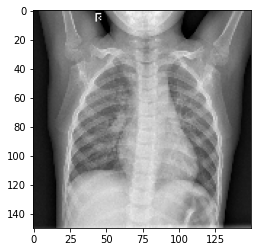

In [ ]:
# Train normal image
img_1 = see_image('/chest_xray/train/NORMAL/IM-0115-0001.jpeg')
print("Normal X-Ray Image")
img_1;

Pneumonia X-Ray Image


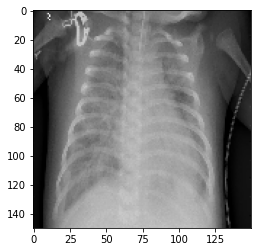

In [ ]:
# Train pneumonia image
img_2 = see_image('/chest_xray/train/PNEUMONIA/person1000_bacteria_2931.jpeg')
print("Pneumonia X-Ray Image")
img_2;

### Preparing to Model

In [ ]:
# Resize images and make training sets with images for Basic NN
train_setb = ImageDataGenerator(rescale= 1./255).flow_from_directory(train_dir, target_size = (64, 64), batch_size = 5216, class_mode = "binary")
test_setb = ImageDataGenerator(rescale= 1./255).flow_from_directory(test_dir, target_size = (64, 64), batch_size = 624, class_mode = "binary")
validation_setb = ImageDataGenerator(rescale= 1./255).flow_from_directory(val_dir, target_size = (64, 64),batch_size = 16, class_mode = "binary")


Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [ ]:
# Create datasets
train_images, train_labels = next(train_setb)
val_images, val_labels = next(validation_setb)
test_images, test_labels = next(test_setb)

> Below I will reshape the datasets in order to use with basic Neural Networks.

In [ ]:
# Check array
train_images[0]

array([[[0.06666667, 0.06666667, 0.06666667],
        [0.10196079, 0.10196079, 0.10196079],
        [0.13725491, 0.13725491, 0.13725491],
        ...,
        [0.00392157, 0.00392157, 0.00392157],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]],

       [[0.02352941, 0.02352941, 0.02352941],
        [0.07058824, 0.07058824, 0.07058824],
        [0.20392159, 0.20392159, 0.20392159],
        ...,
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]],

       [[0.00392157, 0.00392157, 0.00392157],
        [0.05490196, 0.05490196, 0.05490196],
        [0.2392157 , 0.2392157 , 0.2392157 ],
        ...,
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]],

       ...,

       [[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0

In [ ]:
# Identify shapes of image/labels
print('Train Images Shape: ', str(train_images.shape))
print('Train Labels Shape: ', str(train_labels.shape))
print("Number of Training Samples: ", str(train_images.shape[0]))

print('---' * 10)
print('Test Images Shape: ', str(test_images.shape))
print('Test Labels Shape: ', str(test_labels.shape))
print('Number of Test Samples: ', str(test_images.shape[0]))

print('---' * 10)
print('Validation Images Shape: ', str(val_images.shape))
print('Validation Labels Shape: ', str(val_labels.shape))
print("Number of Validation Samples: ", str(val_images.shape[0]))


Train Images Shape:  (5216, 64, 64, 3)
Train Labels Shape:  (5216,)
Number of Training Samples:  5216
------------------------------
Test Images Shape:  (624, 64, 64, 3)
Test Labels Shape:  (624,)
Number of Test Samples:  624
------------------------------
Validation Images Shape:  (16, 64, 64, 3)
Validation Labels Shape:  (16,)
Number of Validation Samples:  16


In [ ]:
# Reshape images for basic NN modeling
train_img = train_images.reshape(train_images.shape[0], -1)
test_img = test_images.reshape(test_images.shape[0], -1)
val_img = val_images.reshape(val_images.shape[0], -1)

print(train_img.shape)
print(test_img.shape)
print(val_img.shape)

(5216, 12288)
(624, 12288)
(16, 12288)


In [ ]:
# Identify labels
train_setb.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

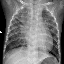

In [ ]:
# Array to Img on Train
array_to_img(train_images[50])

In [ ]:
# Check label
train_labels[50]

1.0

In [ ]:
# Reshape labels for basic NN
train_y= train_labels 
test_y = test_labels 
val_y = val_labels 

In [ ]:
# Check shape
train_y.shape

(5216,)

# Modeling

## Baseline Neural Network Model: 

For the baseline model I used tanh for activation, binary crossentropy for the loss function, and sgd as the optimizer.

In [ ]:
# Load in precision and recall
precision = tf.keras.metrics.Precision()
recall = tf.keras.metrics.Recall()
RMSProp = tf.keras.optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0)

In [ ]:
# Set up a neural network function
def model(activation, loss, optimizer):
  '''Used to set up model for neural network.

  Args:
    Activation = Activation Function
    Loss = Loss Function
    Optimizer = Optimizer

  Returns: 
    A model with dense layers of 64, 32, and 1 with a final Dense layer with the
    sigmoid activation.

  Example: 
    model('tanh', 'binary_crossentropy', 'sgd').'''
    
  np.random.seed(1919)
  baseline = Sequential()
  baseline.add(layers.Dense(64, activation = activation, input_shape = (12288,)))
  baseline.add(layers.Dense(32, activation = activation))
  baseline.add(layers.Dense(1, activation = 'sigmoid'))
  baseline.compile(loss = loss, optimizer = optimizer, metrics = ['acc', precision, recall])
  baseline.summary()
  return baseline

In [ ]:
baseline = model('tanh', 'binary_crossentropy', 'sgd')

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                786496    
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 788,609
Trainable params: 788,609
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Set callback to control run time
callback = tf.keras.callbacks.EarlyStopping(monitor = 'val_acc', min_delta = 0, 
                                            patience = 5, verbose =1, 
                                            restore_best_weights = True)


In [ ]:
# Function to run history/observe runtime
def nn_history(model, epochs, batch_size, callbacks):
  '''nn_history is used to fit the model to the data and record runtime.

  Args:
    model = insert model being used
    epochs = number of epochs desired
    batch_size = number of samples being processed before the model is updated.
    callbacks = used to monitor val_acc with a patience of 5. Used for early stopping.
    If you don't wish to use callback, set equal to None.
  
  Returns: 
    History and time it took to run the model

  Example:
    nn_history(baseline, epochs = 40, batch_size = 50, callbacks = None)'''
  start = datetime.datetime.now()
  history = model.fit(train_img, train_y,
                                epochs=epochs, 
                        batch_size = batch_size,
                                validation_data= (val_img, val_y), callbacks=callbacks)
  end = datetime.datetime.now() 
  time = end - start
  print("Time to Run: ", time)
  return history



In [ ]:
# Set no callbacks to compare complete time with larger size images
history = nn_history(baseline, epochs = 40, batch_size = 50, callbacks = None)

Epoch 1/40
105/105 [==============================] - 1s 7ms/step - loss: 0.4686 - acc: 0.7759 - precision: 0.7983 - recall: 0.9345 - val_loss: 0.9836 - val_acc: 0.5000 - val_precision: 0.5000 - val_recall: 1.0000
Epoch 2/40
105/105 [==============================] - 0s 4ms/step - loss: 0.3521 - acc: 0.8508 - precision: 0.8727 - recall: 0.9357 - val_loss: 1.0896 - val_acc: 0.5625 - val_precision: 0.5333 - val_recall: 1.0000
Epoch 3/40
105/105 [==============================] - 0s 4ms/step - loss: 0.2709 - acc: 0.8875 - precision: 0.9131 - recall: 0.9378 - val_loss: 0.4112 - val_acc: 0.7500 - val_precision: 0.8333 - val_recall: 0.6250
Epoch 4/40
105/105 [==============================] - 0s 5ms/step - loss: 0.2444 - acc: 0.9057 - precision: 0.9266 - recall: 0.9481 - val_loss: 0.6458 - val_acc: 0.6875 - val_precision: 1.0000 - val_recall: 0.3750
Epoch 5/40
105/105 [==============================] - 0s 4ms/step - loss: 0.2227 - acc: 0.9070 - precision: 0.9322 - recall: 0.9435 - val_loss: 

In [ ]:
# Function to evaluate results
def results(model): 
  '''Used to return model results based on train and test.

  Args:
    model = Model used.
  
  Returns:
    Printed results of train and test.

  Example:
    results(baseline)'''
    
  results_train = model.evaluate(train_img, train_y)
  print('Results Train: ',results_train)
  results_test = model.evaluate(test_img, test_y)
  print('Results Test:' ,results_test)

In [ ]:
results(baseline)

163/163 [==============================] - 1s 3ms/step - loss: 0.3398 - acc: 0.8464 - precision: 0.9997 - recall: 0.7935
Results Train:  [0.33982670307159424, 0.8464340567588806, 0.999674916267395, 0.7935484051704407]
20/20 [==============================] - 0s 3ms/step - loss: 0.4183 - acc: 0.8237 - precision: 0.8483 - recall: 0.8744
Results Test: [0.41825592517852783, 0.8237179517745972, 0.8482587337493896, 0.8743589520454407]


In [ ]:
# Function for visulizations
def lossacc(model, test_img, test_y):
  '''lossacc is used to create visualizations of the model including a history
   dataframe, classification report, confusion matrix,
  and visualization plots for loss, accuracy, precision, and recall.
  
  Args:
    model = Model being used.
    test_img = Test images
    test_y = Test labels
    
  Returns:
     History Dataframe
     Classification Report
     Confusion Matrix
     Loss Plot
     Accuracy Plot
     Precision Plot
     Recall Plot
     
  Example: 
    lossacc(baseline, test_img, test_y)'''
  results_df = pd.DataFrame(history.history)
  print('History DataFrame')
  display(results_df.head())

  print('---' * 15)


  #classification report
  y_hat_test = model.predict(test_img)
  y_hat_test = y_hat_test.round() #argmax(axis=1)
  #y_test= test_labels.argmax(axis=1)
  print('CLASSIFICATION REPORT')
  print(metrics.classification_report(test_y, y_hat_test, zero_division=0, target_names = ['Normal', 'Pneumonia']))

  print('---' * 15)

  #Confusion Matrix
  print("CONFUSION MATRIX")
  cm = metrics.confusion_matrix(test_y, y_hat_test, normalize = 'true')

  ax = sns.heatmap(cm, cmap = 'Blues', annot = True)
  ax.set_xticklabels(['Normal', 'Pneumomia'])
  ax.set_yticklabels(['Normal','Pneumonia'])

  # visualizing loss
  ax1 = results_df[[col for col in results_df.columns if 'loss' in col]].plot(marker='+')
  ax1.set(xlabel = 'Epoch', ylabel = 'Mean Squared Error', title = 'LOSS VISUALIZATION');

  # visualizing accuracy
  ax2 = results_df[[col for col in results_df.columns if 'acc' in col]].plot(marker='+')
  ax2.set(xlabel = 'Epoch', ylabel ='Accuracy', title = 'ACCURACY VISUALIZATION');

  #visualizing precision
  ax3 = results_df[[col for col in results_df.columns if 'precision' in col]].plot(marker='+')
  ax3.set(xlabel = 'Epoch', ylabel ='Precision', title = 'PRECISION VISUALIZATION');

 #visualizing recall
  ax3 = results_df[[col for col in results_df.columns if 'recall' in col]].plot(marker='+')
  ax3.set(xlabel = 'Epoch', ylabel ='Recall', title = 'RECALL VISUALIZATION');

History DataFrame


,loss,acc,precision,recall,val_loss,val_acc,val_precision,val_recall
0,0.468565,0.775882,0.798280,0.934452,0.983618,0.5000,0.500000,1.000
1,0.352063,0.850844,0.872684,0.935742,1.089568,0.5625,0.533333,1.000
2,0.270898,0.887462,0.913065,0.937806,0.411227,0.7500,0.833333,0.625
3,0.244395,0.905675,0.926608,0.948129,0.645781,0.6875,1.000000,0.375
4,0.222702,0.907017,0.932177,0.943484,0.753804,0.6250,0.571429,1.000


---------------------------------------------
CLASSIFICATION REPORT
              precision    recall  f1-score   support

      Normal       0.78      0.74      0.76       234
   Pneumonia       0.85      0.87      0.86       390

    accuracy                           0.82       624
   macro avg       0.81      0.81      0.81       624
weighted avg       0.82      0.82      0.82       624

---------------------------------------------
CONFUSION MATRIX


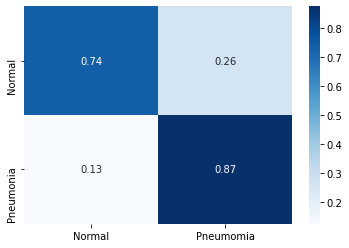

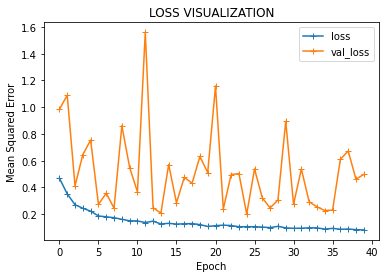

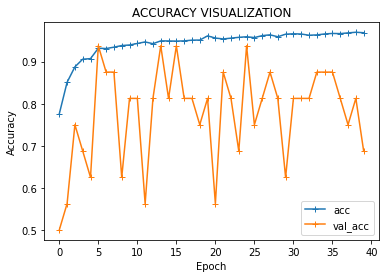

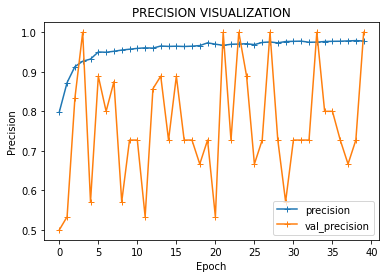

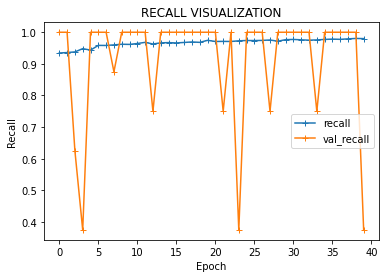

In [ ]:
lossacc(baseline, test_img, test_y)

#### Baseline Model Summary:

> Observing the above visualizations we can see that gradient descent is not where we want it. Although the accuracy is 82% this is not a model we would like to use in predicting pneumonia. Our will be to make the loss, accuracy, precision, and recall visualizations less sparadic. 

### Does size of the image impact runtime in Neural Networks?

In [ ]:
# Increasing image sizes to 150x150
train_set_size = ImageDataGenerator(rescale= 1./255).flow_from_directory(train_dir, target_size = (150, 150), batch_size = 5261, class_mode = "binary")
test_set_size = ImageDataGenerator(rescale= 1./255).flow_from_directory(test_dir, target_size = (150, 150), batch_size = 624, class_mode = "binary")
validation_set_size = ImageDataGenerator(rescale= 1./255).flow_from_directory(val_dir, target_size = (150, 150),batch_size = 16, class_mode = "binary")


Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [ ]:
# Create sets
train_images_size, train_labels_size = next(train_set_size)
val_images_size, val_labels_size = next(validation_set_size)
test_images_size, test_labels_size = next(test_set_size)

In [ ]:
# Identify shapes of image/labels
print('Train Images Shape: ', str(train_images_size.shape))
print('Train Labels Shape: ', str(train_labels_size.shape))
print("Number of Training Samples: ", str(train_images_size.shape[0]))

print('---' * 10)
print('Test Images Shape: ', str(test_images_size.shape))
print('Test Labels Shape: ', str(test_labels_size.shape))
print('Number of Test Samples: ', str(test_images_size.shape[0]))

print('---' * 10)
print('Validation Images Shape: ', str(val_images_size.shape))
print('Validation Labels Shape: ', str(val_labels_size.shape))
print("Number of Validation Samples: ", str(val_images_size.shape[0]))

Train Images Shape:  (5216, 150, 150, 3)
Train Labels Shape:  (5216,)
Number of Training Samples:  5216
------------------------------
Test Images Shape:  (624, 150, 150, 3)
Test Labels Shape:  (624,)
Number of Test Samples:  624
------------------------------
Validation Images Shape:  (16, 150, 150, 3)
Validation Labels Shape:  (16,)
Number of Validation Samples:  16


In [ ]:
train_img_size = train_images_size.reshape(train_images_size.shape[0], -1)
test_img_size = test_images_size.reshape(test_images_size.shape[0], -1)
val_img_size = val_images_size.reshape(val_images_size.shape[0], -1)

print(train_img_size.shape)
print(val_img_size.shape)

(5216, 67500)
(16, 67500)


In [ ]:
train_y_size= train_labels_size
test_y_size = test_labels_size
val_y_size = val_labels_size

In [ ]:
# Run same model as baseline
np.random.seed(1919)
baseline_size = Sequential()
baseline_size.add(layers.Dense(64, activation = 'tanh', input_shape = (67500,)))
baseline_size.add(layers.Dense(23, activation = 'tanh'))
baseline_size.add(layers.Dense(1, activation = 'sigmoid'))
baseline_size.compile(loss = 'binary_crossentropy', optimizer = 'sgd', metrics = ['acc', precision, recall])
baseline_size.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 64)                4320064   
_________________________________________________________________
dense_4 (Dense)              (None, 23)                1495      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 24        
Total params: 4,321,583
Trainable params: 4,321,583
Non-trainable params: 0
_________________________________________________________________


In [ ]:
start = datetime.datetime.now()
history = baseline_size.fit(train_img_size, train_y_size,
                                epochs=40, 
                        batch_size = 50,
                                validation_data= (val_img_size, val_y_size))
end = datetime.datetime.now() 
time = end - start
print("Time to Run: ", time)

Epoch 1/40
105/105 [==============================] - 1s 12ms/step - loss: 0.5419 - acc: 0.7395 - precision: 0.7511 - recall: 0.9805 - val_loss: 0.7330 - val_acc: 0.5000 - val_precision: 0.5000 - val_recall: 1.0000
Epoch 2/40
105/105 [==============================] - 1s 10ms/step - loss: 0.4411 - acc: 0.7717 - precision: 0.7791 - recall: 0.9667 - val_loss: 1.0704 - val_acc: 0.5000 - val_precision: 0.5000 - val_recall: 1.0000
Epoch 3/40
105/105 [==============================] - 1s 9ms/step - loss: 0.3537 - acc: 0.8443 - precision: 0.8797 - recall: 0.9156 - val_loss: 0.5330 - val_acc: 0.6875 - val_precision: 0.8000 - val_recall: 0.5000
Epoch 4/40
105/105 [==============================] - 1s 9ms/step - loss: 0.2865 - acc: 0.8915 - precision: 0.9205 - recall: 0.9347 - val_loss: 0.7687 - val_acc: 0.5000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/40
105/105 [==============================] - 1s 10ms/step - loss: 0.2675 - acc: 0.8909 - precision: 0.9265 - recall: 0.9267 -

In [ ]:
results_train = baseline_size.evaluate(train_img_size, train_y_size)
print('Results Train: ',results_train)
results_test = baseline_size.evaluate(test_img_size, test_y_size)
print('Results Test:' ,results_test)

163/163 [==============================] - 1s 6ms/step - loss: 0.3164 - acc: 0.8587 - precision: 0.9981 - recall: 0.8114
Results Train:  [0.31637540459632874, 0.8587039709091187, 0.9980952143669128, 0.8113548159599304]
20/20 [==============================] - 0s 7ms/step - loss: 0.3913 - acc: 0.8237 - precision: 0.8665 - recall: 0.8487
Results Test: [0.3912604749202728, 0.8237179517745972, 0.8664921522140503, 0.8487179279327393]


History DataFrame


,loss,acc,precision,recall,val_loss,val_acc,val_precision,val_recall
0,0.541887,0.739456,0.751078,0.980539,0.732968,0.5000,0.5,1.0
1,0.441136,0.771664,0.779118,0.966710,1.070405,0.5000,0.5,1.0
2,0.353711,0.844325,0.879742,0.915613,0.533004,0.6875,0.8,0.5
3,0.286530,0.891488,0.920457,0.934710,0.768722,0.5000,0.0,0.0
4,0.267514,0.890913,0.926471,0.926710,0.940725,0.5000,0.5,1.0


---------------------------------------------
CLASSIFICATION REPORT
              precision    recall  f1-score   support

      Normal       0.76      0.78      0.77       234
   Pneumonia       0.87      0.85      0.86       390

    accuracy                           0.82       624
   macro avg       0.81      0.82      0.81       624
weighted avg       0.83      0.82      0.82       624

---------------------------------------------
CONFUSION MATRIX


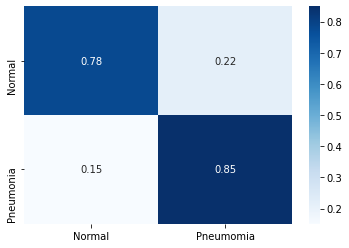

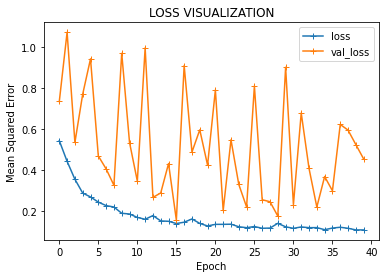

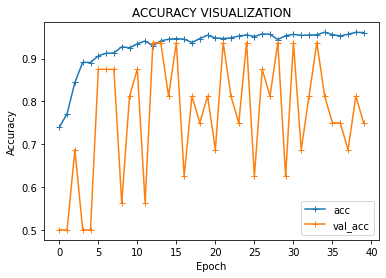

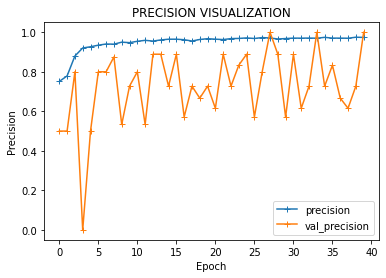

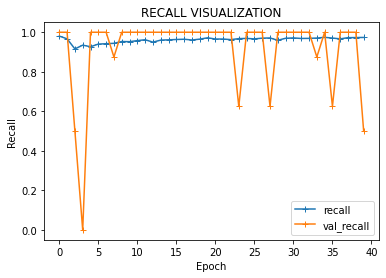

In [ ]:
lossacc(baseline_size, test_img_size, test_y_size)

#### Baseline Model with Larger Images (150 x 150)

> By increasing the size of our images from 64 x 64 to 150 x 150 we slowed down our modeling process by over 20 seconds and decreased our level of accuracy. Going forward we will continue to use images sized 64 x 64.

## Neural Network Model 2:

For the second model I am going to change the activation to 'relu', the optimizer to 'RMSProp', and increase batch side by 14.

---



In [ ]:
model_2 = model('relu', 'binary_crossentropy', 'RMSProp')

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 64)                786496    
_________________________________________________________________
dense_7 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 33        
Total params: 788,609
Trainable params: 788,609
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = nn_history(model_2, epochs = 40, batch_size = 64, callbacks = callback)

Epoch 1/40
82/82 [==============================] - 1s 8ms/step - loss: 1.5470 - acc: 0.7046 - precision: 0.8040 - recall: 0.8106 - val_loss: 0.5513 - val_acc: 0.7500 - val_precision: 0.8333 - val_recall: 0.6250
Epoch 2/40
82/82 [==============================] - 0s 5ms/step - loss: 0.5244 - acc: 0.7981 - precision: 0.8501 - recall: 0.8841 - val_loss: 0.5184 - val_acc: 0.7500 - val_precision: 0.7000 - val_recall: 0.8750
Epoch 3/40
82/82 [==============================] - 0s 5ms/step - loss: 0.3818 - acc: 0.8541 - precision: 0.8865 - recall: 0.9215 - val_loss: 0.4490 - val_acc: 0.7500 - val_precision: 0.7500 - val_recall: 0.7500
Epoch 4/40
82/82 [==============================] - 0s 5ms/step - loss: 0.3714 - acc: 0.8530 - precision: 0.8940 - recall: 0.9099 - val_loss: 0.3903 - val_acc: 0.8125 - val_precision: 0.8571 - val_recall: 0.7500
Epoch 5/40
82/82 [==============================] - 0s 5ms/step - loss: 0.3062 - acc: 0.8746 - precision: 0.9023 - recall: 0.9321 - val_loss: 0.5037 - v

In [ ]:
results(model_2)

163/163 [==============================] - 1s 3ms/step - loss: 0.2555 - acc: 0.8890 - precision: 0.9802 - recall: 0.8681
Results Train:  [0.25550347566604614, 0.8889954090118408, 0.9801864624023438, 0.8681290149688721]
20/20 [==============================] - 0s 3ms/step - loss: 0.3363 - acc: 0.8510 - precision: 0.8741 - recall: 0.8897
Results Test: [0.3363415598869324, 0.8509615659713745, 0.8740554451942444, 0.8897435665130615]


History DataFrame


,loss,acc,precision,recall,val_loss,val_acc,val_precision,val_recall
0,1.547016,0.704563,0.803953,0.810551,0.551287,0.7500,0.833333,0.625
1,0.524441,0.798121,0.850124,0.884129,0.518397,0.7500,0.700000,0.875
2,0.381791,0.854103,0.886544,0.921548,0.448968,0.7500,0.750000,0.750
3,0.371414,0.852952,0.894016,0.909935,0.390314,0.8125,0.857143,0.750
4,0.306243,0.874617,0.902323,0.932129,0.503704,0.8125,0.727273,1.000


---------------------------------------------
CLASSIFICATION REPORT
              precision    recall  f1-score   support

      Normal       0.81      0.79      0.80       234
   Pneumonia       0.87      0.89      0.88       390

    accuracy                           0.85       624
   macro avg       0.84      0.84      0.84       624
weighted avg       0.85      0.85      0.85       624

---------------------------------------------
CONFUSION MATRIX


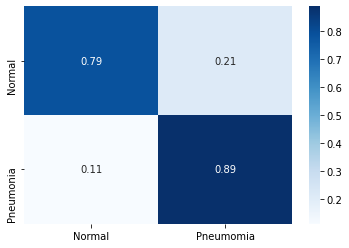

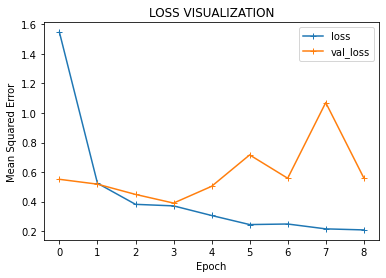

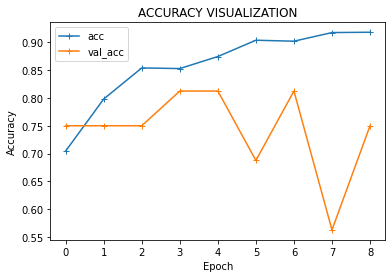

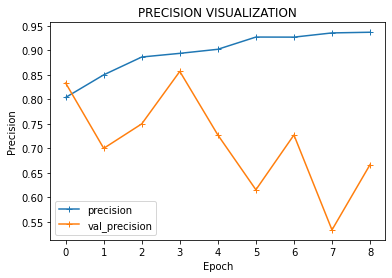

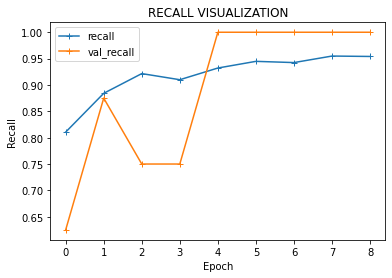

In [ ]:
lossacc(model_2, test_img, test_y)

#### Neural Network Model 2 Summary:

> Changing the activation, optimizer, and batch size we increased our accuracy and recall. The precision for Pneumonia classification increased as well. We can see that our visualizations appear to be slightly more stable than before.

## Neural Network Model 3: 

For the third model I am going to add layers to the neural network and keep the majority of the parameters the same as Model 2 using 'relu', Binary Crossentropy, and 'RMSProp'. 

In [ ]:
# Set up a baseline
def model_layers(activation, loss, optimizer):
  '''Used to set up model for neural network.

  Args:
    Activation = Activation Function
    Loss = Loss Function
    Optimizer = Optimizer

  Returns: 
    A model with dense layers of 64, 32, 16, and 1 with a final Dense layer with the
    sigmoid activation.

  Example: 
    model('tanh', 'binary_crossentropy', 'sgd').'''

  np.random.seed(1919)
  baseline = Sequential()
  baseline.add(layers.Dense(64, activation = activation, input_shape = (12288,)))
  baseline.add(layers.Dense(32, activation = activation))
  baseline.add(layers.Dense(16, activation = activation))
  baseline.add(layers.Dense(1, activation = 'sigmoid'))
  baseline.compile(loss = loss, optimizer = optimizer, metrics = ['acc', precision, recall])
  baseline.summary()
  return baseline

In [ ]:
model_3 = model_layers('relu','binary_crossentropy', 'RMSProp')

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 64)                786496    
_________________________________________________________________
dense_10 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_11 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 17        
Total params: 789,121
Trainable params: 789,121
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = nn_history(model_3, epochs = 50, batch_size = 64, callbacks = callback)

Epoch 1/50
82/82 [==============================] - 1s 9ms/step - loss: 0.7854 - acc: 0.7232 - precision: 0.7767 - recall: 0.8978 - val_loss: 0.5651 - val_acc: 0.7500 - val_precision: 0.8333 - val_recall: 0.6250
Epoch 2/50
82/82 [==============================] - 0s 5ms/step - loss: 0.4173 - acc: 0.8152 - precision: 0.8443 - recall: 0.9210 - val_loss: 1.4040 - val_acc: 0.5000 - val_precision: 0.5000 - val_recall: 1.0000
Epoch 3/50
82/82 [==============================] - 0s 6ms/step - loss: 0.3238 - acc: 0.8668 - precision: 0.8969 - recall: 0.9272 - val_loss: 0.4640 - val_acc: 0.8125 - val_precision: 0.7778 - val_recall: 0.8750
Epoch 4/50
82/82 [==============================] - 0s 5ms/step - loss: 0.2742 - acc: 0.8901 - precision: 0.9176 - recall: 0.9363 - val_loss: 0.4028 - val_acc: 0.8125 - val_precision: 0.8571 - val_recall: 0.7500
Epoch 5/50
82/82 [==============================] - 0s 5ms/step - loss: 0.2587 - acc: 0.8967 - precision: 0.9187 - recall: 0.9445 - val_loss: 0.5409 - v

In [ ]:
results(model_3)

163/163 [==============================] - 1s 4ms/step - loss: 0.2455 - acc: 0.8999 - precision: 0.9692 - recall: 0.8937
Results Train:  [0.24549980461597443, 0.8999233245849609, 0.9692135453224182, 0.8936774134635925]
20/20 [==============================] - 0s 3ms/step - loss: 0.3494 - acc: 0.8542 - precision: 0.8568 - recall: 0.9205
Results Test: [0.349403440952301, 0.8541666865348816, 0.8568019270896912, 0.9205127954483032]


History DataFrame


,loss,acc,precision,recall,val_loss,val_acc,val_precision,val_recall
0,0.785369,0.723159,0.776673,0.897773,0.565118,0.7500,0.833333,0.625
1,0.417304,0.815184,0.844334,0.921032,1.404011,0.5000,0.500000,1.000
2,0.323822,0.866756,0.896905,0.927226,0.463999,0.8125,0.777778,0.875
3,0.274178,0.890146,0.917552,0.936258,0.402840,0.8125,0.857143,0.750
4,0.258680,0.896664,0.918675,0.944516,0.540928,0.8125,0.727273,1.000


---------------------------------------------
CLASSIFICATION REPORT
              precision    recall  f1-score   support

      Normal       0.85      0.74      0.79       234
   Pneumonia       0.86      0.92      0.89       390

    accuracy                           0.85       624
   macro avg       0.85      0.83      0.84       624
weighted avg       0.85      0.85      0.85       624

---------------------------------------------
CONFUSION MATRIX


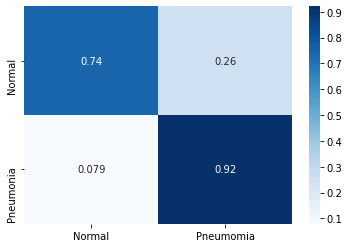

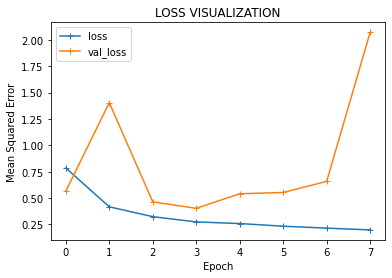

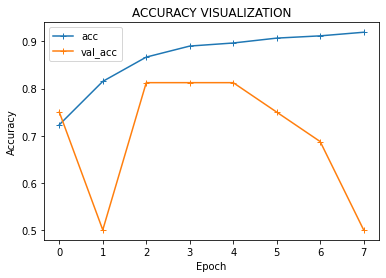

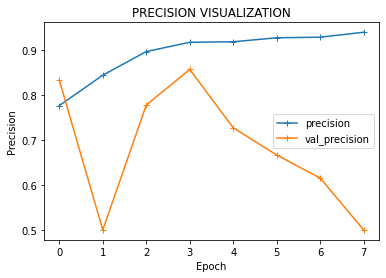

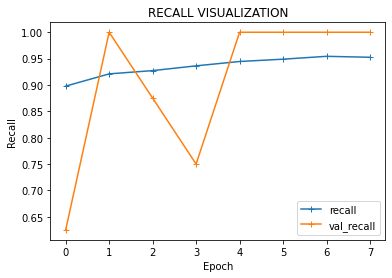

In [ ]:
lossacc(model_3, test_img, test_y)

#### Neural Network Model 3 Summary: 

> By adding layers we can see many of our numbers are looking better. Accuracy rose, recall for normal increased, precision increased, and our visualizations are slowly starting to smooth out. This would be the model I would choose to use our of the Neural Networks created.

# Convolutional Neural Networks

## Baseline CNN Model:

> The first CNN model will use the parameters from our third basic neural network: tanh, binary crossentropy, and RMSProp, and the same amount of Dense Layers.

In [ ]:
#build model
def cnn_model(filter1, filter2, activation, loss, optimizer):
  '''Used to set up model for a convolutional neural network.

  Args:
    filter1 = Number of filters desired for first convolutional layer.
    filter2 = Number of filters desired for second convolutional layer.
    Activation = Activation Function
    Loss = Loss Function
    Optimizer = Optimizer

  Returns: 
    A convolutional neural network model with two layers off Conv2D and Max Pooling, 
    then four dense layers of 64, 32, 16, and 1 with a final Dense layer using
    sigmoid activation.

  Example: 
    cnn_model(32, 64, 'relu', 'binary_crossentropy', RMSProp').'''
    
  cnn_1 = Sequential()
  cnn_1.add(layers.Conv2D(filter1, (3, 3), activation=activation,
                          padding = 'valid', 
                          input_shape=(64, 64, 3)))
  cnn_1.add(layers.MaxPooling2D((2, 2), padding = 'valid'))
  layers.Dropout(.25, noise_shape=None, seed=None)

  cnn_1.add(layers.Conv2D(filter2, (3, 3), activation=activation))
  cnn_1.add(layers.MaxPooling2D((2, 2)))

  cnn_1.add(layers.Flatten())
  cnn_1.add(layers.Dense(64, activation=activation))
  cnn_1.add(layers.Dense(32, activation=activation))
  cnn_1.add(layers.Dense(16, activation = activation))
  cnn_1.add(layers.Dense(1, activation='sigmoid'))

  cnn_1.compile(loss=loss,
                optimizer=optimizer,
                metrics=['acc', precision, recall])
  cnn_1.summary()
  return cnn_1

In [ ]:
first_cnn = cnn_model(32, 64, 'relu', 'binary_crossentropy', 'RMSProp')

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 12544)             0         
_________________________________________________________________
dense_13 (Dense)             (None, 64)                802880    
_________________________________________________________________
dense_14 (Dense)             (None, 32)               

In [ ]:
def cnn_history(model, steps_per_epoch, epochs, batch_size):
  '''cnn_history is used to fit the convolutional neural network model to the data 
  and record runtime.

  Args:
    model = insert model being used
    steps_per_epochs = number of steps per epoch
    epochs = number of epochs desired
    batch_size = number of samples being processed before the model is updated.
  
  Returns: 
    History and time it took to run the model

  Example:
    cnn_history(first_cnn, 163, 8, 32)'''
  start = datetime.datetime.now()
  history = model.fit(train_images, train_labels, 
                                epochs=epochs, 
                      steps_per_epoch = steps_per_epoch, 
                        batch_size = batch_size,
                                validation_data= (val_images, val_labels), callbacks= [callback])
  end = datetime.datetime.now() 
  time = end - start
  print("Time to Run: ", time)
  return history

In [ ]:
history = cnn_history(first_cnn, 163, 8, 32)

Epoch 1/8
163/163 [==============================] - 1s 7ms/step - loss: 0.3712 - acc: 0.8470 - precision: 0.8662 - recall: 0.9362 - val_loss: 0.2936 - val_acc: 0.8125 - val_precision: 0.8571 - val_recall: 0.7500
Epoch 2/8
163/163 [==============================] - 1s 6ms/step - loss: 0.1562 - acc: 0.9421 - precision: 0.9577 - recall: 0.9646 - val_loss: 1.2456 - val_acc: 0.5625 - val_precision: 0.5333 - val_recall: 1.0000
Epoch 3/8
163/163 [==============================] - 1s 5ms/step - loss: 0.1185 - acc: 0.9565 - precision: 0.9713 - recall: 0.9701 - val_loss: 0.1518 - val_acc: 0.9375 - val_precision: 0.8889 - val_recall: 1.0000
Epoch 4/8
163/163 [==============================] - 1s 5ms/step - loss: 0.0999 - acc: 0.9657 - precision: 0.9773 - recall: 0.9765 - val_loss: 0.5078 - val_acc: 0.6875 - val_precision: 0.6154 - val_recall: 1.0000
Epoch 5/8
163/163 [==============================] - 1s 5ms/step - loss: 0.0893 - acc: 0.9664 - precision: 0.9793 - recall: 0.9755 - val_loss: 0.090

In [ ]:
def acnn_results(model): 
  '''Used to return model results based on train and test.

  Args:
    model = Model used.
  
  Returns:
    Printed results of train and test.

  Example:
    acnn_results(baseline)'''

  results_train = model.evaluate(train_images, train_labels)
  print('Results Train: ',results_train)
  results_test = model.evaluate(test_images, test_labels)
  print('Results Test:' ,results_test)

In [ ]:
acnn_results(first_cnn)

163/163 [==============================] - 1s 4ms/step - loss: 0.0329 - acc: 0.9885 - precision: 0.9982 - recall: 0.9863
Results Train:  [0.03290439769625664, 0.9884969592094421, 0.998171865940094, 0.9863225817680359]
20/20 [==============================] - 0s 4ms/step - loss: 0.9352 - acc: 0.7837 - precision: 0.7485 - recall: 0.9846
Results Test: [0.9352380037307739, 0.7836538553237915, 0.7485380172729492, 0.9846153855323792]


In [ ]:
def acnn_lossacc(model, test_images, test_y):
  '''acnn_lossacc is used to create visualizations of the convolutional neural network
   model including a history dataframe, classification report, confusion matrix,
  and visualization plots for loss, accuracy, precision, and recall.
  
  Args:
    model = Model being used.
    test_images = Test images
    test_y = Test labels
    
  Returns:
     History Dataframe
     Classification Report
     Confusion Matrix
     Loss Plot
     Accuracy Plot
     Precision Plot
     Recall Plot
     
  Example: 
    acnn_lossacc(baseline, test_img, test_y)'''
  results_df = pd.DataFrame(history.history)
  print('History DataFrame')
  display(results_df.head())

  print('---' * 15)


  #classification report
  y_hat_test = model.predict(test_images).round()
  
  print('CLASSIFICATION REPORT')
  print(metrics.classification_report(test_y, y_hat_test, zero_division=0, target_names = ['Normal', 'Pneumonia']))


  print('---' * 15)

  #Confusion Matrix
  print("CONFUSION MATRIX")
  cm = metrics.confusion_matrix(test_y, y_hat_test, normalize = 'true')#, labels = ['Normal', 'Pneumonia'])

  ax = sns.heatmap(cm, cmap = 'Blues', annot = True)
  ax.set_xticklabels(["Normal", "Pneumonia"])
  ax.set_yticklabels(["Normal", "Pneumonia"])


  # visualizing loss
  ax1 = results_df[[col for col in results_df.columns if 'loss' in col]].plot(marker='+')
  ax1.set(xlabel = 'Epoch', ylabel = 'Mean Squared Error', title = 'LOSS VISUALIZATION');

  # visualizing accuracy
  ax2 = results_df[[col for col in results_df.columns if 'acc' in col]].plot(marker='+')
  ax2.set(xlabel = 'Epoch', ylabel ='Accuracy', title = 'ACCURACY VISUALIZATION');

  #visualizing precision
  ax2 = results_df[[col for col in results_df.columns if 'precision' in col]].plot(marker='+')
  ax2.set(xlabel = 'Epoch', ylabel ='Precision', title = 'PRECISION VISUALIZATION');

  #visualizing recall
  ax2 = results_df[[col for col in results_df.columns if 'recall' in col]].plot(marker='+')
  ax2.set(xlabel = 'Epoch', ylabel ='Recall', title = 'RECALL VISUALIZATION');

History DataFrame


,loss,acc,precision,recall,val_loss,val_acc,val_precision,val_recall
0,0.371208,0.847009,0.866161,0.936225,0.293582,0.8125,0.857143,0.75
1,0.156180,0.942101,0.957725,0.964645,1.245617,0.5625,0.533333,1.00
2,0.118522,0.956480,0.971318,0.970065,0.151840,0.9375,0.888889,1.00
3,0.099909,0.965683,0.977273,0.976516,0.507808,0.6875,0.615385,1.00
4,0.089318,0.966449,0.979275,0.975484,0.090682,1.0000,1.000000,1.00


---------------------------------------------
CLASSIFICATION REPORT
              precision    recall  f1-score   support

      Normal       0.95      0.45      0.61       234
   Pneumonia       0.75      0.98      0.85       390

    accuracy                           0.78       624
   macro avg       0.85      0.72      0.73       624
weighted avg       0.82      0.78      0.76       624

---------------------------------------------
CONFUSION MATRIX


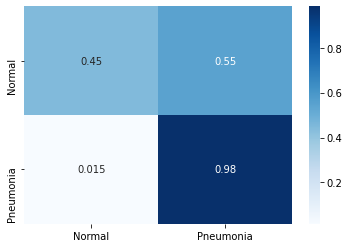

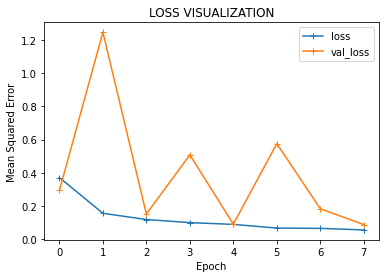

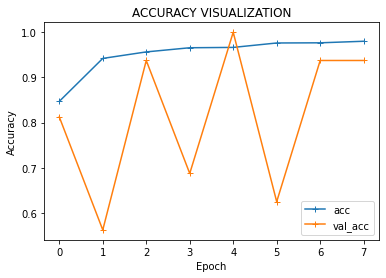

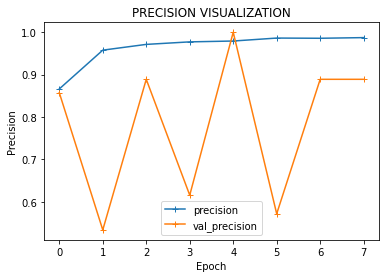

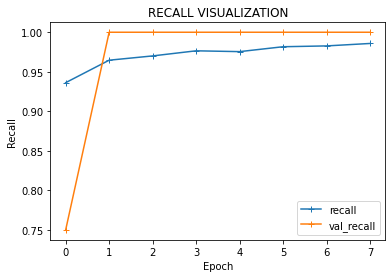

In [ ]:
acnn_lossacc(first_cnn, test_images, test_labels)

#### First CNN Model Summary:
> 77% accuracy. Still struggling at smoothing out visualizations. Quality of model has dropped since last basic neural network.

## CNN Model 2:

For our second CNN Model I increased the filter size and batch size.

In [ ]:
cnn_2 = cnn_model(64, 96, 'relu', 'binary_crossentropy', 'RMSProp')

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 62, 62, 64)        1792      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 29, 29, 96)        55392     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 96)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 18816)             0         
_________________________________________________________________
dense_17 (Dense)             (None, 64)                1204288   
_________________________________________________________________
dense_18 (Dense)             (None, 32)               

In [ ]:
history = cnn_history(cnn_2, 163, 8, 64)

Epoch 1/8
163/163 [==============================] - 2s 12ms/step - loss: 0.3201 - acc: 0.8642 - precision: 0.8782 - recall: 0.9397 - val_loss: 0.2927 - val_acc: 0.8750 - val_precision: 0.8750 - val_recall: 0.8750
Epoch 2/8
163/163 [==============================] - 2s 10ms/step - loss: 0.1361 - acc: 0.9522 - precision: 0.9677 - recall: 0.9679 - val_loss: 0.1612 - val_acc: 0.9375 - val_precision: 0.8889 - val_recall: 1.0000
Epoch 3/8
163/163 [==============================] - 2s 10ms/step - loss: 0.0962 - acc: 0.9616 - precision: 0.9736 - recall: 0.9748 - val_loss: 0.2779 - val_acc: 0.8750 - val_precision: 0.8000 - val_recall: 1.0000
Epoch 4/8
163/163 [==============================] - 2s 10ms/step - loss: 0.0696 - acc: 0.9752 - precision: 0.9849 - recall: 0.9817 - val_loss: 0.0530 - val_acc: 1.0000 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 5/8
  4/163 [..............................] - 0s 21ms/step - loss: 0.0386 - acc: 0.9866 - precision: 0.9942 - recall: 0.9885 - val_loss: 

In [ ]:
acnn_results(cnn_2)

163/163 [==============================] - 1s 4ms/step - loss: 0.0443 - acc: 0.9866 - precision: 0.9979 - recall: 0.9840
Results Train:  [0.04430185258388519, 0.9865797758102417, 0.9979063272476196, 0.984000027179718]
20/20 [==============================] - 0s 4ms/step - loss: 0.9312 - acc: 0.7917 - precision: 0.7529 - recall: 0.9923
Results Test: [0.931196928024292, 0.7916666865348816, 0.7529183030128479, 0.9923076629638672]


History DataFrame


,loss,acc,precision,recall,val_loss,val_acc,val_precision,val_recall
0,0.320052,0.864231,0.878167,0.939741,0.292718,0.8750,0.875000,0.875
1,0.136137,0.952160,0.967692,0.967943,0.161150,0.9375,0.888889,1.000
2,0.096208,0.961613,0.973558,0.974822,0.277922,0.8750,0.800000,1.000
3,0.069622,0.975212,0.984868,0.981667,0.052979,1.0000,1.000000,1.000
4,0.038622,0.986607,0.994220,0.988506,0.049989,1.0000,1.000000,1.000


---------------------------------------------
CLASSIFICATION REPORT
              precision    recall  f1-score   support

      Normal       0.97      0.46      0.62       234
   Pneumonia       0.75      0.99      0.86       390

    accuracy                           0.79       624
   macro avg       0.86      0.72      0.74       624
weighted avg       0.84      0.79      0.77       624

---------------------------------------------
CONFUSION MATRIX


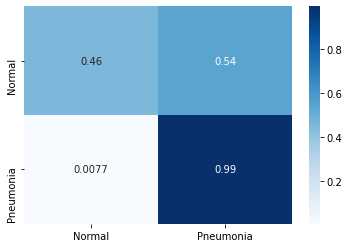

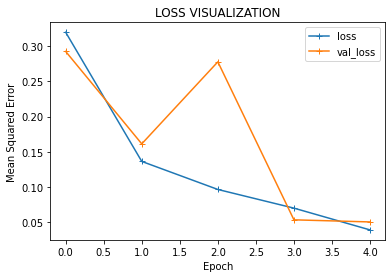

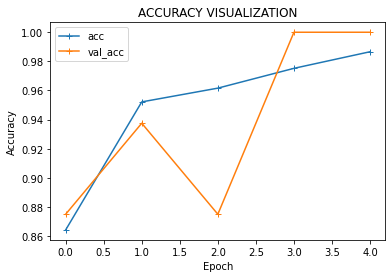

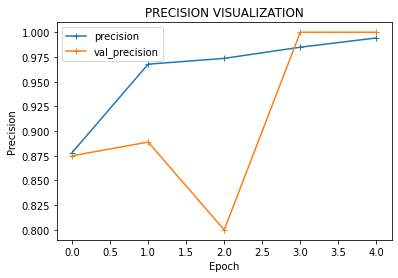

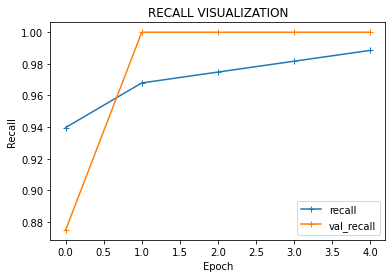

In [ ]:
acnn_lossacc(cnn_2, test_images, test_labels)

#### Second CNN Model Summary:

> Visualizations are looking better. Would like to see if we can increase recall for Normal. The final CNN Model will be shown in the interpret section because this model ended up with the best results when looking at accuracy and precision.

# Interpret

## Final CNN Model:

> Layers added, filtersize changed, dense layers filter size changed.

In [ ]:
# Set callback to control run time
callback = tf.keras.callbacks.EarlyStopping(monitor = 'val_acc', min_delta = 0, 
                                            patience = 3, verbose =1, 
                                            restore_best_weights = False)

In [ ]:
def cnn_model_layers(filter1, filter2, filter3, filter4, activation, loss, optimizer):
  '''Used to set up a more complex model for a convolutional neural network.

  Args:
    filter1 = Number of filters desired for first convolutional layer.
    filter2 = Number of filters desired for second convolutional layer.
    filter3 = Number of filters desired for third convolutional layer.
    filter4 = Number of filters desired for fourth convolutional layer.
    Activation = Activation Function
    Loss = Loss Function
    Optimizer = Optimizer

  Returns: 
    A convolutional neural network model with four layers off Conv2D and Max Pooling, 
    then four dense layers of 128, 64, 32, and 1 with a final Dense layer using
    sigmoid activation.

  Example: 
    cnn_model_layers(64, 128, 512, 512, 'relu', 'binary_crossentropy', opti).'''
  
  cnn_1 = Sequential()
  cnn_1.add(layers.Conv2D(filter1, (3, 3), activation=activation,
                          input_shape=(64, 64, 3)))
  cnn_1.add(layers.Conv2D(filter1, (3, 3), activation=activation))
  cnn_1.add(layers.MaxPooling2D((2, 2)))

  cnn_1.add(layers.Conv2D(filter2, (3, 3), activation=activation))
  cnn_1.add(layers.Conv2D(filter2, (3, 3), activation=activation))
  cnn_1.add(layers.MaxPooling2D((2, 2)))

  cnn_1.add(layers.Conv2D(filter3, (3, 3), activation=activation))
  cnn_1.add(layers.Conv2D(filter3, (3, 3), activation=activation))
  cnn_1.add(layers.MaxPooling2D((2, 2)))

  cnn_1.add(layers.Conv2D(filter4, (3, 3), activation=activation))
  cnn_1.add(layers.MaxPooling2D((2, 2)))

  cnn_1.add(layers.Flatten())
  cnn_1.add(layers.Dense(256, activation=activation))
  cnn_1.add(layers.Dense(128, activation=activation))
  cnn_1.add(layers.Dense(32, activation=activation))

  cnn_1.add(layers.Dense(1, activation='sigmoid'))

  cnn_1.compile(loss=loss,
                optimizer=optimizer,
                metrics=['acc', precision, recall])
  cnn_1.summary()
  return cnn_1

In [ ]:
opti = tf.keras.optimizers.RMSprop(learning_rate = 0.00001)

In [ ]:
opti2 = tf.keras.optimizers.Adam(learning_rate = .0001)

In [ ]:
cnn_3 = cnn_model_layers(64, 128, 512, 512, 'relu', 'binary_crossentropy', opti)

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_66 (Conv2D)           (None, 62, 62, 64)        1792      
_________________________________________________________________
conv2d_67 (Conv2D)           (None, 60, 60, 64)        36928     
_________________________________________________________________
max_pooling2d_37 (MaxPooling (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_68 (Conv2D)           (None, 28, 28, 128)       73856     
_________________________________________________________________
conv2d_69 (Conv2D)           (None, 26, 26, 128)       147584    
_________________________________________________________________
max_pooling2d_38 (MaxPooling (None, 13, 13, 128)       0         
_________________________________________________________________
conv2d_70 (Conv2D)           (None, 11, 11, 512)     

In [ ]:
history = cnn_history(cnn_3, 96, 20, 128)

Epoch 1/20
96/96 [==============================] - 6s 58ms/step - loss: 0.5923 - acc: 0.7384 - precision: 0.7414 - recall: 0.9900 - val_loss: 0.8422 - val_acc: 0.5000 - val_precision: 0.5000 - val_recall: 1.0000
Epoch 2/20
96/96 [==============================] - 5s 55ms/step - loss: 0.5287 - acc: 0.7427 - precision: 0.7427 - recall: 1.0000 - val_loss: 0.7782 - val_acc: 0.5000 - val_precision: 0.5000 - val_recall: 1.0000
Epoch 3/20
96/96 [==============================] - 5s 54ms/step - loss: 0.4247 - acc: 0.7920 - precision: 0.7870 - recall: 0.9866 - val_loss: 0.5635 - val_acc: 0.6875 - val_precision: 0.6154 - val_recall: 1.0000
Epoch 4/20
96/96 [==============================] - 5s 55ms/step - loss: 0.3458 - acc: 0.8473 - precision: 0.8614 - recall: 0.9467 - val_loss: 0.7621 - val_acc: 0.6250 - val_precision: 0.5714 - val_recall: 1.0000
Epoch 5/20
96/96 [==============================] - 5s 55ms/step - loss: 0.3053 - acc: 0.8648 - precision: 0.8874 - recall: 0.9371 - val_loss: 1.114

In [ ]:
acnn_results(cnn_3)

163/163 [==============================] - 1s 7ms/step - loss: 0.2653 - acc: 0.8905 - precision: 0.9275 - recall: 0.9249
Results Train:  [0.2653428614139557, 0.8905291557312012, 0.9275362491607666, 0.9249032139778137]
20/20 [==============================] - 0s 7ms/step - loss: 0.3642 - acc: 0.8397 - precision: 0.8420 - recall: 0.9154
Results Test: [0.3642408847808838, 0.8397436141967773, 0.8419811129570007, 0.9153845906257629]


History DataFrame


,loss,acc,precision,recall,val_loss,val_acc,val_precision,val_recall
0,0.592294,0.738384,0.741423,0.989973,0.842195,0.5000,0.500000,1.0
1,0.528727,0.742719,0.742719,1.000000,0.778203,0.5000,0.500000,1.0
2,0.424716,0.791995,0.787018,0.986622,0.563507,0.6875,0.615385,1.0
3,0.345778,0.847349,0.861412,0.946661,0.762069,0.6250,0.571429,1.0
4,0.305281,0.864774,0.887431,0.937101,1.114344,0.6250,0.571429,1.0


---------------------------------------------
CLASSIFICATION REPORT
              precision    recall  f1-score   support

      Normal       0.83      0.71      0.77       234
   Pneumonia       0.84      0.92      0.88       390

    accuracy                           0.84       624
   macro avg       0.84      0.81      0.82       624
weighted avg       0.84      0.84      0.84       624

---------------------------------------------
CONFUSION MATRIX


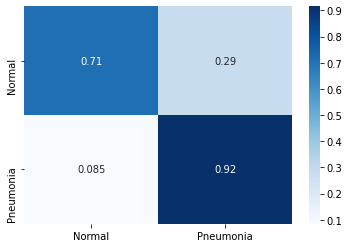

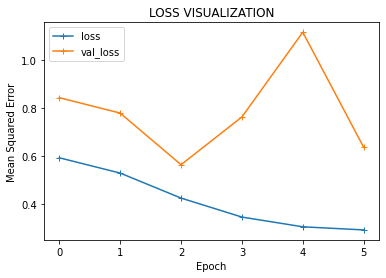

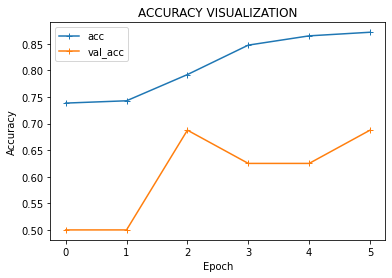

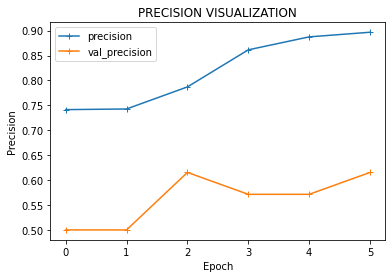

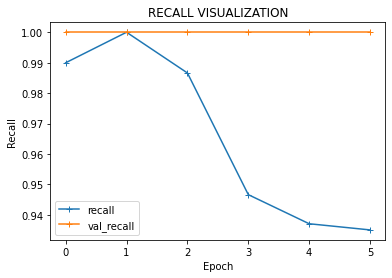

In [ ]:
acnn_lossacc(cnn_3, test_images, test_labels)

> We can see that this final Convolutional Neural Network had overall higher scores than the other Models. Therefore looking at precision, accuracy, recall, and loss I would say this is the best model to use going forward.

## Lime


In [ ]:
!pip install lime
import lime
from lime import lime_image, lime_base
from lime.wrappers.scikit_image import SegmentationAlgorithm
from skimage.segmentation import mark_boundaries

explainer = lime_image.LimeImageExplainer()

     |████████████████████████████████| 276kB 8.9MB/s 
  Created wheel for lime: filename=lime-0.2.0.1-cp36-none-any.whl size=283845 sha256=55ae23a1bfb97989bd12c671eddf68eaf7d8b7a7f9a3fdb685ec3bed90df51a9
  Stored in directory: /root/.cache/pip/wheels/4c/4f/a5/0bc765457bd41378bf3ce8d17d7495369d6e7ca3b712c60c89
Successfully built lime


In [ ]:
class_lookup = {v:k for k,v in train_setb.class_indices.items()}
class_lookup

{0: 'NORMAL', 1: 'PNEUMONIA'}

Image 1983 = PNEUMONIA
 - Model Predicted PNEUMONIA


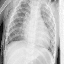

In [ ]:
#Grab random label and image from train
i = np.random.choice(range(len(train_labels)))
label = train_labels[i]
img = train_images[i]

#Model Prediction
pred = cnn_3.predict(np.array([img]))
pred_class = int(pred.round())

#print the true class, predicted class, and show image
print(f"Image {i} = {class_lookup[int(label)]}")
print(f" - Model Predicted {class_lookup[pred_class]}")
array_to_img(img)

In [ ]:
explanation = explainer.explain_instance(img, cnn_3.predict, num_samples = 1000)

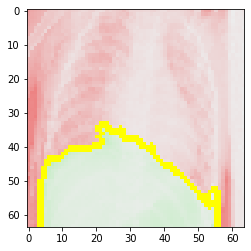

In [ ]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only = False, num_features = 5, hide_rest = False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

> Using Lime we are able to see what parts of the picture the model uses to identify if the X-Ray image is normal or of pneumonia. Although results change based on the image, this can help us see how our model is interpreting the visualization. 

### Summary

Within this notebook I explored different pathways for creating a model to correctly identify X-Ray Images of pediatric patients with pneumonia. I begun my creating a baseline model using Basic Neural Networks. From there I explored different parameters and number of layers to improve the Basic Neural Network Models. The next step was to apply Convolutional Neural Networks due to their success rate with image recognition. The first Convolutional Neural Network Model used the same parameters as my most successful baseline model. This originally decreased the quality of my model, by changing filter size and increasing batch size I began to see an increase in the overall functionality of the model. CNN Model 3, which is the model I would recommend putting into production, had the best results. This Model was provided with extra convolutional and dense layers, larger filter and batch sizes, as well as smaller learning rate with RMSprop. This helped bring precision, recall, and accuracy all above 80%. 

### Recommendations

1. Use a Convolutional Neural Network over a Basic Neural Network.
2. Use a 64 x 64 image size when using the model.
3. Precision vs. Recall: Depending on the illness or treatment one may be more important than the other. In the case of pneumonia focus on recall.

### Future Work
1. Use a larger dataset to improve accuracy and precision.
2. Look at X-Rays of adult lungs with and without Pneumonia.
3. Use a premade CNN to see if they could potentially work better.

Thank you for your time.